# The NCAA Transfer Portal and College Football Recruiting

October 15th, 2018. The NCAA announces a massive new change, creating the NCAA Transfer Portal to be made available to college athletes. In the midst of numerous debates about the lack of freedoms that college athletes had with current NCAA rules at the time, this was a monumental milestone in providing more of that "freedom" to these athletes.

However, after having a few years to run its course, what kind of impact might the transfer portal have had on recruiting football prospects coming into NCAA programs?

Does the transfer portal provide an effect of "spreading the wealth" of talent across more college football programs? Does it motivate these prospects to commit to the "elite" level programs, knowing that if things don't work out for them the way they envisioned, that a transfer somewhere else is always an option now?

Let's analyze the data and see what we can find!

We'll start by reading in our recruiting database file, and cleaning it up, as shown below.

***NOTE***: The source of the individual recruit data being used is from the site CollegeFootballData.com.

In [1]:
#importing

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#read file

data = pd.read_csv('C:/Users/Ryan/Desktop/Python/CFB Analysis/Recruiting Database.csv',
                  encoding = 'Latin1')

#preview file

data.head()

,id,athleteId,recruitType,year,ranking,name,school,committedTo,position,height,weight,stars,rating,city,stateProvince,country,hometownInfo.latitude,hometownInfo.longitude,hometownInfo.fipsCode
0,61569,4428988.0,HighSchool,2020,1,Bryan Bresee,Damascus,Clemson,DT,77.0,290.0,5,0.9995,Damascus,MD,USA,39.288438,-77.203872,24031.0
1,61570,4685720.0,HighSchool,2020,2,Bryce Young,Mater Dei,Alabama,DUAL,71.0,183.0,5,0.9994,Santa Ana,CA,USA,33.749495,-117.873221,6059.0
2,61571,4430800.0,HighSchool,2020,3,Julian Fleming,Southern Columbia,Ohio State,WR,74.0,199.0,5,0.9979,Catawissa,PA,USA,40.954827,-76.460987,42037.0
3,61572,4428992.0,HighSchool,2020,4,Kelee Ringo,Saguaro,Georgia,CB,74.0,205.0,5,0.9976,Scottsdale,AZ,USA,33.494219,-111.926018,4013.0
4,61573,4428994.0,HighSchool,2020,5,Arik Gilbert,Marietta,LSU,TE,77.0,253.0,5,0.9972,Marietta,GA,USA,33.952847,-84.549615,13067.0


Although I collected the data above from the site CollegeFootballData.com, the recruit information displayed above is from the site 247Sports.com.

The nice thing about having the data from 247Sports is that their recruit ratings are based on a composite score from 3 different recruiting evaluation sites. They use recruit ratings from ESPN.com, Rivals.com, and 247Sports' own individual opinions on recruit performance. The composite score takes all three scores into account and provides the rating attribute you see above.

In [2]:
#removing unneeded columns

data = data.drop(['id', 'athleteId', 'school', 'height', 'weight', 'city', 'stateProvince', 'country',
                  'hometownInfo.latitude', 'hometownInfo.longitude', 'hometownInfo.fipsCode'], axis=1)

#renaming some columns

data = data.rename(columns={'ranking':'classRank', 'committedTo':'college'})

#showing updated dataframe

data.head()

,recruitType,year,classRank,name,college,position,stars,rating
0,HighSchool,2020,1,Bryan Bresee,Clemson,DT,5,0.9995
1,HighSchool,2020,2,Bryce Young,Alabama,DUAL,5,0.9994
2,HighSchool,2020,3,Julian Fleming,Ohio State,WR,5,0.9979
3,HighSchool,2020,4,Kelee Ringo,Georgia,CB,5,0.9976
4,HighSchool,2020,5,Arik Gilbert,LSU,TE,5,0.9972


While the transfer portal was introduced in 2018, I wanted to include recruiting data from both before and after the portal. I am going to filter the information from 2016 to 2021, providing three years of data both before and after portal implementation.

For more accurate data, even though it shouldn't impact our analysis here, I am also going to remove any players who were uncommitted on National Signing Day for their class year.

In [3]:
#filtering recruits from 2016 to 2021

data = data[data['year'] >= 2016]

#removing uncommitted recruits

data = data[data['college'].notnull()]

## Selecting Elite Teams

I had some fun with this part.

One of the many things that makes college football so great is the constant posturing and arguing from fanbases and their teams. So, for an interesting "side experiment," I messaged some of my friends who are big college football fans to ask them who would be in their current elite group. None of the answers I received back, outside of three programs, were the same from any of them.

From the start, I had three programs in mind who I already decided would be in the elite group: Alabama, Clemson, and Ohio State. These were the three programs my friends also all consistently mentioned. However, there were three other programs that came up in some responses, but not in all, which I will refer to as "maybes": Oklahoma, LSU and Georgia.

Coming up with reasoning to add these teams to the elite group was difficult, so I consulted some data to help decide, which you can see below.

As a side note, the criteria to qualify for the elite group in this analysis consists of programs who are considered to be elite recently, as of the 2016 season.

***NOTE***: The college football postseason data I put together myself in an Excel CSV file, while the season records data is collected from, again, CollegeFootballData.com.

In [4]:
#importing college football playoff data

playoff = pd.read_csv('C:/Users/Ryan/Desktop/Python/CFB Analysis/CFB Championship Database.csv')

playoff.head()

,Team,Game Reached,Champion?,Year,Era
0,Miami,Final,Yes,2001,BCS
1,Nebraska,Final,No,2001,BCS
2,Ohio State,Final,Yes,2002,BCS
3,Miami,Final,No,2002,BCS
4,LSU,Final,Yes,2003,BCS


In [5]:
#filtering years from 2016 to 2021

finalists = playoff[playoff['Year'] >= 2016]

#filtering for reaching championship game

finalists = finalists[finalists['Game Reached'] == 'Final']

#showing teams who have championship game appearance

print('Schools with Championship Game Appearance Since 2016:')

print(finalists['Team'].value_counts())

Schools with Championship Game Appearance Since 2016:
Alabama       4
Clemson       3
Ohio State    1
LSU           1
Georgia       1
Name: Team, dtype: int64


In [6]:
#showing teams who have playoff appearance

sfinals = playoff[playoff['Year'] >= 2016]

print('Schools with Playoff Appearance Since 2016:')

print(sfinals['Team'].value_counts())

Schools with Playoff Appearance Since 2016:
Clemson       5
Alabama       4
Ohio State    3
Oklahoma      3
Notre Dame    2
Washington    1
Georgia       1
LSU           1
Name: Team, dtype: int64


The no doubt elite schools for the group, Alabama, Clemson and Ohio State, showcase their strong resumes here. Each program has at least 3 playoff appearances since 2016, and, in the case of Alabama and Clemson, the only programs with multiple championship game appearances.

However, each of our bubble teams (Oklahoma, LSU and Georgia) have their own cases to be made here. Both LSU and Georgia have something Oklahoma doesn't, which is a national title game appearance. It is also worth noting that LSU did win a national title in 2019. Georgia appeared in the national title game during its only playoff qualification in 2017.

On the other hand, in the case of Oklahoma, they have something the other two programs don't: multiple playoff appearances since 2016. In fact, they are right there with the three other elite programs in terms of appearances.

Maybe we can further decide on who to add to the elite group by looking at winning percentages of programs since 2016.

In [7]:
#importing school season records data

records = pd.read_csv('C:/Users/Ryan/Desktop/Python/CFB Analysis/CFB Season Records.csv', encoding = 'Latin1')

records.head()

,year,team,conference,division,total.games,total.wins,total.losses,total.ties,conferenceGames.games,conferenceGames.wins,conferenceGames.losses,conferenceGames.ties,homeGames.games,homeGames.wins,homeGames.losses,homeGames.ties,awayGames.games,awayGames.wins,awayGames.losses,awayGames.ties
0,2020,Air Force,Mountain West,Mountain,6,3,3,0,4,2,2,0,3,2,1,0,3,1,2,0
1,2020,Akron,Mid-American,East,6,1,5,0,6,1,5,0,3,1,2,0,3,0,3,0
2,2020,Alabama,SEC,West,13,13,0,0,11,11,0,0,5,5,0,0,5,5,0,0
3,2020,Appalachian State,Sun Belt,NaN,12,9,3,0,8,6,2,0,6,5,1,0,5,3,2,0
4,2020,Arizona,Pac-12,South,5,0,5,0,5,0,5,0,3,0,3,0,2,0,2,0


In [8]:
#cleaning info

records = records.drop(['division', 'total.ties', 'conferenceGames.games', 'conferenceGames.wins',
                       'conferenceGames.losses', 'homeGames.games', 'homeGames.wins', 'homeGames.losses',
                       'homeGames.ties', 'awayGames.games', 'awayGames.wins', 'awayGames.losses', 'awayGames.ties',
                       'conferenceGames.ties'], axis=1)

records = records.rename(columns={'total.games':'games', 'total.wins':'wins', 'total.losses':'losses'})

In [9]:
#filtering for 2016 to 2021

records = records[records['year'] >= 2016]

#creating win percentage column

records['win_pct'] = round(((records.wins)/(records.games)),2)

#retrieving total win percentage by team since 2016

team_group = records.groupby('team').agg(np.mean)['win_pct']

print('Program winning percentages since 2016:')

print(team_group.sort_values(ascending=False).head(15))

Program winning percentages since 2016:
team
Alabama              0.928
Clemson              0.910
Ohio State           0.890
Oklahoma             0.850
Appalachian State    0.798
Georgia              0.788
Boise State          0.780
UCF                  0.750
Washington           0.742
Notre Dame           0.740
LSU                  0.726
Penn State           0.724
Wisconsin            0.724
Memphis              0.710
Iowa                 0.690
Name: win_pct, dtype: float64


Interesting. Again, our three no doubt elite programs further showcase their strong resumes here. What's interesting, though, is the winning percentages of our bubble teams.

Oklahoma's winning percentage is very impressive (85%). They are actually the only other team, outside of the three elites, to have a winning percentage above 80%, and even 85%. This, again, gives them something in common with the three elites that Georgia (79%) and LSU (73%) don't have.

After reviewing all of this data, I have decided to add only Oklahoma to the elite group with Alabama, Clemson, and Ohio State. Although all three have very solid arguments, I believe having a winning percentage at 85%, along with multiple playoff appearances, for Oklahoma shows ***sustained*** success over the time period we are analyzing.

In [10]:
#grouping colleges by elite level

elites = ['Alabama', 'Ohio State', 'Clemson', 'Oklahoma']

data['eliteLevel'] = ''

data['eliteLevel'] = np.where(data.college.isin(elites), 'Elite', 'Non-Elite')

## Transfer Portal and Blue Chip Prospect Recruiting

Now that we have our elite programs group, we can analyze how their recruiting efforts have fared against the rest of college football. Please keep in mind, the results of the elite group are going up against some teams in the non-elite group who are also very good programs that recruit well (LSU, Georgia, Notre Dame, and Penn State, to name a few).

We will start by anazlying the portal's potential effect on recruiting blue chip prospects. A **blue chip recruit** is considered to be either a 4 or 5 star player, and are highly sought after by every program in the country. While the number of stars a prospect has does not always reflect performance on the field in college, getting blue chip prospects into a program certainly helps to contribute to program success.

To conduct this analysis, I am first going to append the original database by adding a column (eliteLevel) to categorize each recruit based on if they are attending a program in the "elite" list. Then, I will create a new dataset from our original to include only players with a 4 or 5 star rating, and create the elite and non-elite groups based on the filtered data. To finish this section, I will calculate the percentage of blue chip recruits each group gained a commitment from in each recruiting year.

In [11]:
#keeping 4 and 5 stars as blue chip recruits

chips = data.copy()

chips = chips[chips['stars'] >= 4]

grouped = chips.groupby(['year', 'eliteLevel'])['eliteLevel'].count().rename("count")

percentage = grouped / grouped.groupby('year').sum() * 100
percentage = round(percentage,2)
percentage = percentage.reset_index()

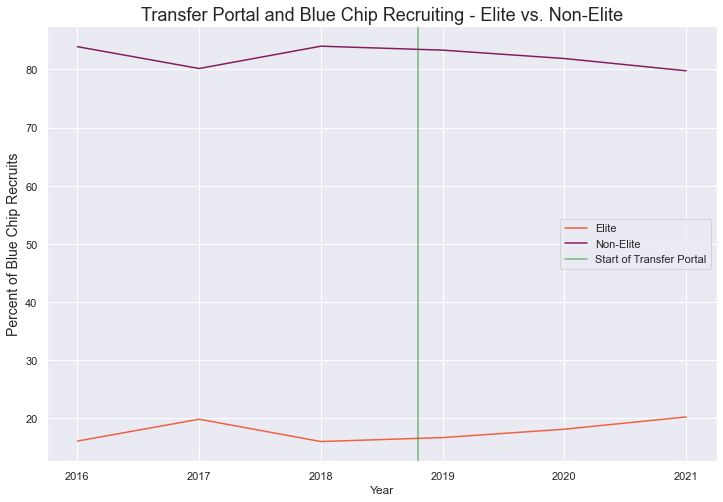

In [12]:
sns.set_theme() #setting seaborn theme

#plotting 

fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(x='year', y='count', data=percentage, hue='eliteLevel', palette='rocket_r')
#set vertical line to 2018.8 to roughly reflect portal open in October 2018
plt.axvline(2018.8, color='green', label='Start of Transfer Portal', alpha=0.5)
plt.title('Transfer Portal and Blue Chip Recruiting - Elite vs. Non-Elite', fontsize=18)
plt.xlabel('Year')
plt.ylabel('Percent of Blue Chip Recruits', fontsize=14)
plt.legend()
plt.show()

Looking at the graph above, we can see that despite a blip in 2017, the blue chip prospect talent seemed to be more evenly dispersed between elite and non-elite programs, sitting near 15% in 2016 and 2018, before the transfer portal was introduced officially.

Since the transfer portal was implemented during football season of the 2019 recruiting class, it doesn't appear there was much time for it to really make an impact on those 2019 blue chip recruits (although it did increase slightly from 2018). It does appear that it made an impact with the 2020 and 2021 classes. The elite group's blue chip commitment percentage increased with each of those years.

## Transfer Portal and Five Star Prospect Recruiting

Next, we are going to analyze the effects the transfer portal may have had on recruiting five star high school football players. Five star players are the most talented recruits in a class every year. While blue chip prospects are highly sought after, five star players are usually recruited the hardest because of their level of talent.

For analysis in this section, I will create a copy of the original data and filter it to include only players who have a 5 star rating, group them by school based on if the player's school is in the elite group or not, and then create a percentage of the five star talent pool each group received in each class.

In [13]:
five_stars = data.copy() #create copy of original data

five_stars = five_stars[five_stars['stars'] == 5]

five_stars.shape #ensuring filter results

(189, 9)

In [14]:
five_stars_group = five_stars.groupby(['year', 'eliteLevel'])['eliteLevel'].count().rename('count')
fs_percentage = five_stars_group / five_stars_group.groupby('year').sum() * 100
fs_percentage = round(fs_percentage,2)
fs_percentage = fs_percentage.reset_index()

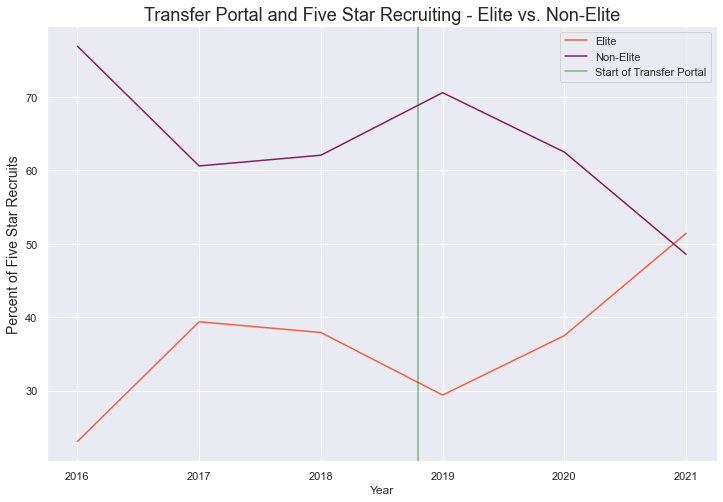

In [15]:
#plotting

fig = plt.figure(figsize=(12,8))

sns.lineplot(data=fs_percentage, x='year', y='count', hue='eliteLevel', palette='rocket_r')
plt.title('Transfer Portal and Five Star Recruiting - Elite vs. Non-Elite', fontsize = 18)
plt.xlabel('Year')
plt.ylabel('Percent of Five Star Recruits', fontsize=14)
plt.axvline(2018.8, color='green', label = 'Start of Transfer Portal', alpha=0.5)
plt.legend()
plt.show()

The non-elite group had the greatest percentage of five star prospects in 2016 before the elite group sharply rebounded with the next class. When the portal was introduced before National Signing Day in 2019, a more balanced trend was starting to show between the groups. 

However, after the 2019 class, five star prospects seemed more eager to sign with elite level programs, as displayed by the upward trajectory of the elite line. Worth noting, the elite group (remember, only four programs) gained a commitment from more than half (!) of the five star talent pool in 2021.

## Transfer Portal and Average Group Recruit Rating

Another area we can analyze is the potential effect the transfer portal has had on the average rating per recruiting class of each group.

For this section, I decided to limit the data to include only programs in the Power 5 conferences (Big Ten, SEC, ACC, Big 12, and Pac-12). This allows for an analysis on programs who are more "evenly matched" in resources, avoiding any significant mismatches and limits outliers.

To perform this analysis, I will create a copy of our original data and records data and filter out any programs who are not a member of the Power 5 conferences. Then, I will group the data by year and elite level and provide the average rating of a recruit in each group for that given recruiting class.

In [16]:
avg = data.copy() #create copy of original data

rec_2 = records.copy() #create copy of records dataframe

power_5_list = ['Big Ten', 'SEC', 'ACC', 'Big 12', 'Pac-12']

conf_filter = rec_2.conference.isin(power_5_list)
rec_2 = rec_2[conf_filter]

teams = avg.college.isin(rec_2.team)
avg = avg[teams]

avg.shape #ensuring filter results

(8688, 9)

In [21]:
group_avg = avg.groupby(['year', 'eliteLevel'])['rating'].agg(np.mean).rename('rating')
group_avg = group_avg.reset_index()

print('Elite vs. Non-Elite Group Average Recruit Rating')

print(round((group_avg),4)) #providing printed numbers

Elite vs. Non-Elite Group Average Recruit Rating
    year eliteLevel  rating
0   2016      Elite  0.9074
1   2016  Non-Elite  0.8566
2   2017      Elite  0.9230
3   2017  Non-Elite  0.8571
4   2018      Elite  0.9181
5   2018  Non-Elite  0.8651
6   2019      Elite  0.9177
7   2019  Non-Elite  0.8702
8   2020      Elite  0.9219
9   2020  Non-Elite  0.8683
10  2021      Elite  0.9461
11  2021  Non-Elite  0.8725


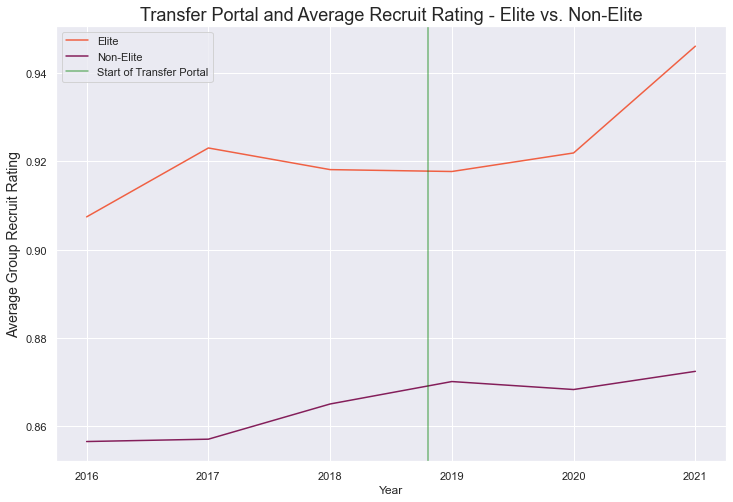

In [18]:
#plotting

fig = plt.figure(figsize=(12,8))
sns.lineplot(data=group_avg, x='year', y='rating', hue='eliteLevel', palette='rocket_r')
plt.title('Transfer Portal and Average Recruit Rating - Elite vs. Non-Elite', fontsize = 18)
plt.xlabel('Year')
plt.ylabel('Average Group Recruit Rating', fontsize=14)
plt.axvline(2018.8, color='green', label='Start of Transfer Portal', alpha=0.5)
plt.legend()
plt.show()

The elite group never had a class where their average recruit rating finished below .90, while the non-elite group's highest mark (2021) barely made it above .87, the only time this group managed to do so.

Maybe the most outstanding point to make from the above graph is where the elite group's average rating finished in 2021. While their average rating seemed to hover around .92, it jumped significantly in 2021 to above .94! This lead to the greatest disparity in class talent between the two groups in the analyzed time frame.

How does the transfer portal figure into this graph? Right after the portal's creation in 2019, the average rating of each group finished at its closest in the time frame. However, as seems to be the case with the other two charts, the elite group's line increased with the two full recruiting years (2020 and 2021) following the portal.

## Conclusion

After reviewing all of the above data, I believe we can objectively conclude that the transfer portal has had at least some effect on recruiting.

The elite programs in our list (Alabama, Clemson, Ohio State and Oklahoma) experienced significant increases in the number of commitments they received from five star recruits since the portal's inception. They also "chipped away" (no pun intended) on receiving more signatures from blue chip recruits since October 2018 as well.

We also noticed that the elite group seemed to benefit from a better average recruit rating in the years after the portal's creation than before it. The non-elite group did see a jump as well, although very slight and not nearly to the extent of the elite group.

When the top talent in every recruiting class is becoming more likely to sign with an elite program each year, especially five star prospects, this makes the already existing divide between elite and non-elite programs even larger. In some instances, this allows some teams to roll out blue chip prospects as *backups* in games where their opponent may be lucky to have even as many as five blue chip prospects *on the entire team.*

Again, acquiring this talent does **not** always mean that the players will develop as they should. There are system fits and development programs that play a significant role to on field success beyond their ratings. However, when each program is able to bring in blue chip talent at an increasing level year after year, it can only help ensure the elite group's spot at the top of the college football world.